In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vasukipatel_face_recognition_dataset_path = kagglehub.dataset_download('vasukipatel/face-recognition-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-recognition-dataset/Dataset.csv
/kaggle/input/face-recognition-dataset/Faces/Faces/Courtney Cox_24.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Henry Cavill_9.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Charlize Theron_68.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Courtney Cox_55.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Billie Eilish_88.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Robert Downey Jr_88.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Lisa Kudrow_30.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Priyanka Chopra_47.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Alexandra Daddario_5.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Hrithik Roshan_50.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Claire Holt_29.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Andy Samberg_13.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Elizabeth Olsen_64.jpg
/kaggle/

In [ ]:
df=pd.read_csv("/kaggle/input/face-recognition-dataset/Dataset.csv")
df.head()

,id,label
0,Robert Downey Jr_87.jpg,Robert Downey Jr
1,Lisa Kudrow_64.jpg,Lisa Kudrow
2,Ellen Degeneres_34.jpg,Ellen Degeneres
3,Billie Eilish_3.jpg,Billie Eilish
4,Hrithik Roshan_35.jpg,Hrithik Roshan


In [ ]:
# Facial Recognition - Use Cropped Faces Directly (No OpenCV Detection)
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
IMG_SIZE = 100
FACES_DIR = "/kaggle/input/face-recognition-dataset/Faces/Faces"
TARGET_PERSON = "Tom Cruise"  # Binary classification target

In [ ]:
# Read images and labels
def load_faces(face_dir, target_person):
    data = []
    for fname in os.listdir(face_dir):
        if not fname.lower().endswith(".jpg"):
            continue
        label_name = fname.rsplit("_", 1)[0]
        label = 1 if label_name == target_person else 0
        img_path = os.path.join(face_dir, fname)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img_to_array(img) / 255.0
            data.append([img, label])
        except Exception as e:
            continue
    return data

In [ ]:
print("📦 Loading cropped face images...")
data = load_faces(FACES_DIR, TARGET_PERSON)
print(f"✅ Loaded {len(data)} face images.")

📦 Loading cropped face images...
✅ Loaded 2562 face images.


In [ ]:
# Step 3: Prepare training and testing sets
X, y = zip(*data)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-25 06:46:46.866563: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,352,641 (16.60 MB)

 Trainable params: 4,352,641 (16.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train the model
print("🚀 Training CNN model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {accuracy:.2f}")

🚀 Training CNN model...
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - accuracy: 0.9580 - loss: 0.1856 - val_accuracy: 0.9747 - val_loss: 0.1346
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.9775 - loss: 0.1493 - val_accuracy: 0.9747 - val_loss: 0.1176
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.9783 - loss: 0.1333 - val_accuracy: 0.9747 - val_loss: 0.1052
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - accuracy: 0.9769 - loss: 0.1113 - val_accuracy: 0.9747 - val_loss: 0.1095
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9773 - loss: 0.1054 - val_accuracy: 0.9747 - val_loss: 0.0873
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.9819 - loss: 0.0783 - val_accuracy: 0.9747 - val_loss: 0.0867
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9847 - loss: 0.0664 - val_accuracy: 0.9747 - val_loss: 0.0689
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - accuracy: 0.9755 -

In [ ]:
# Step 7: Show random prediction
def show_random_prediction():
    idx = random.randint(0, len(X_test) - 1)
    sample = X_test[idx]
    actual = y_test[idx]
    pred = model.predict(np.expand_dims(sample, axis=0))[0][0]
    label = "Tom Cruise" if pred > 0.5 else "Not Tom Cruise"

    plt.imshow(sample.reshape(IMG_SIZE, IMG_SIZE), cmap="gray")
    plt.title(f"Predicted: {label} ({pred:.2f}) | Actual: {'Tom Cruise' if actual==1 else 'Other'}")
    plt.axis('off')
    plt.show()

In [ ]:
import random


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


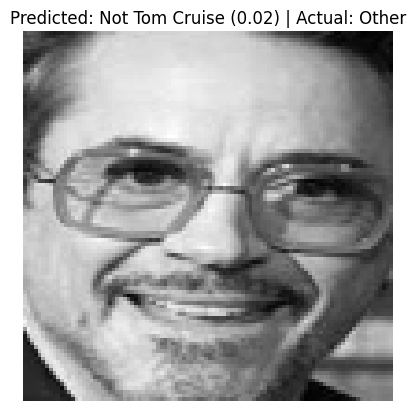

In [ ]:
# Step 8: Run example
show_random_prediction()